In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


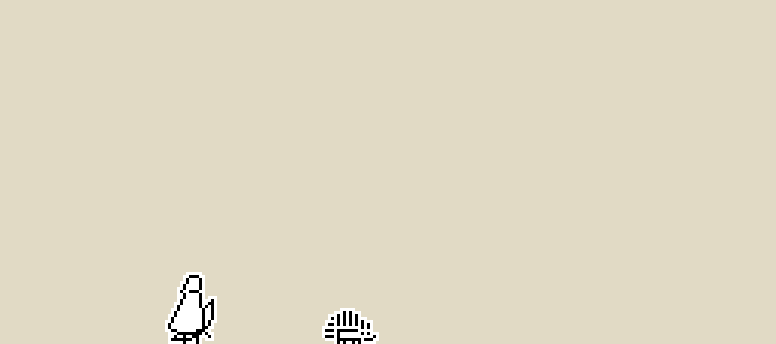

128.0 144.0 [100. 116.]


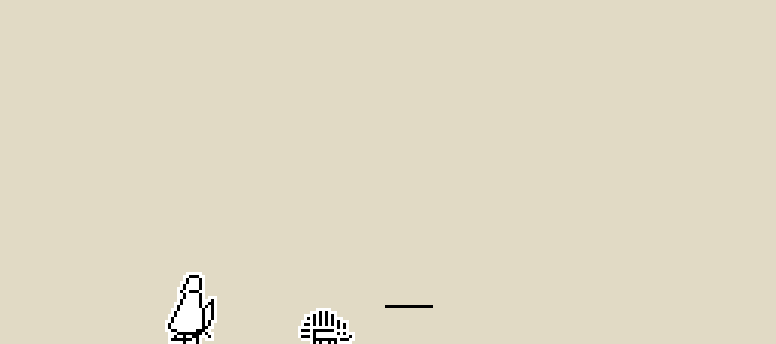

96.0 112.0 [ 92. 108.]


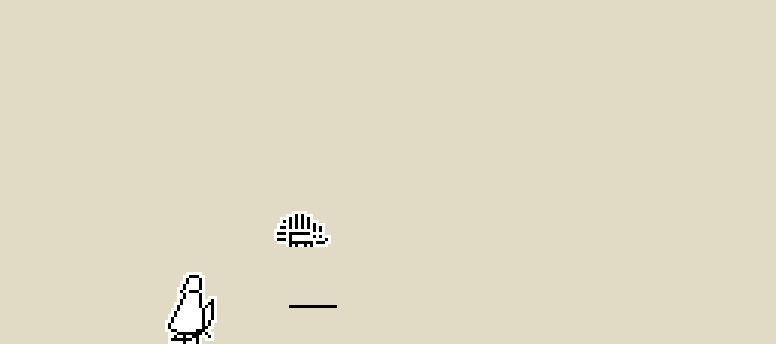

In [1]:
from IPython.display import display, clear_output
import ipywidgets as widgets
from renderer import Renderer, shoot, update, drop_destroyed
from PIL.Image import Image, open as open_image, new as new_image, Resampling
import imagehash
import io
import numpy as np

slider = widgets.IntSlider(value=10, min=1, max=10)
shoot_button = widgets.Button(description='Выстрел')
shoot_button.on_click(lambda _: _shoot(slider.value))
update_button = widgets.Button(description='Обновить')
update_button.on_click(lambda _: _update())
gui = widgets.VBox([update_button, slider, shoot_button])
renderer = Renderer()

last_hash = ""
f= None

def _draw_screen():
    global last_hash, f
    clear_output()
    display(gui)
    f = renderer.render(debug=True)
    display(f)

def _shoot(d):
    shoot(int(d))
    update()

    _draw_screen()
    drop_destroyed()

def _update():
    update()
    _draw_screen()

_update()